#CAPTURE IMAGES


In [1]:
def one_time():
    import pyscreenshot as ImageGrab
    import time
    import os
    import time
    parent_folder = r"C:\Users\Ramesh Kothari\Desktop\ML\letters_images\p"

    for i in range(1,41):
        time.sleep(10)
        # Code to capture and save the image
        ig = ImageGrab.grab(bbox=(100, 380, 800, 836))  # x1, y1, x2, y2
        letter = "p"  
        # Save the image in the corresponding folder
        folder_path = parent_folder + "/" + letter
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

        image_path = folder_path + "/" + str(i) + '.png'
        ig.save(image_path)
        print(f"Saved image {i} in folder {letter}")
        print("Clear the screen and redraw")


#Generate dataset


In [9]:
import cv2
import csv
import os

def binarize_image(image, threshold=100):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))

main_folder = r"C:\Users\Ramesh Kothari\Desktop\ML\letters_images"  # Set this variable to the correct path

with open('character_dataset.csv', 'a+', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)

    for label in range(ord('A'), ord('Z') + 1):
        label_char = chr(label)
        folder_path = os.path.join(main_folder, label_char, label_char.lower())

        if not os.path.exists(folder_path):
            continue

        dirList = os.listdir(folder_path)

        for img_name in dirList:
            img_path = os.path.join(folder_path, img_name)
            im = cv2.imread(img_path)
            if im is None:
                print(f"Failed to load image: {img_path}")
                continue

            im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
            im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
            roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)

            binarized_roi = binarize_image(roi)

            data = [label_char]
            rows, cols = binarized_roi.shape

            # Fill the data array with pixels one by one.
            for i in range(rows):
                for j in range(cols):
                    k = binarized_roi[i, j] // 255  # Normalize to 0 or 1
                    data.append(k)

            writer.writerow(data)


#Load the dataset

In [12]:
import pandas as pd
from sklearn.utils import shuffle

# Provide the correct file path to the dataset.csv file
file_path = r"C:\Users\Ramesh Kothari\Desktop\ML\character_dataset.csv"

data = pd.read_csv(file_path)
data = shuffle(data)
print(data)


    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
96      C       1       1       1       1       1       1       1       1   
89      C       1       1       1       1       1       1       1       1   
183     H       1       1       1       1       1       1       1       1   
12      A       0       0       0       0       0       0       0       0   
216     O       1       1       1       1       1       1       1       1   
..    ...     ...     ...     ...     ...     ...     ...     ...     ...   
197     H       1       1       1       1       1       1       1       1   
321     Z       1       1       1       1       1       1       1       1   
303     S       1       1       1       1       1       1       1       1   
268     P       1       1       1       1       1       1       1       1   
285     S       1       1       1       1       1       1       1       1   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel77

#Separate dependent and independent variables


In [13]:
X = data.drop(["label"],axis=1)
Y= data["label"]

S


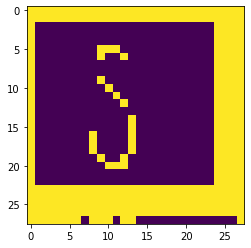

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 285
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)


#Train test split

In [21]:
from sklearn.model_selection import train_test_split #function
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

#Fit the model using svc and also save the model using joblib

In [23]:
import os
import joblib
from sklearn.svm import SVC

# Create an instance of the SVM classifier with a linear kernel
classifier = SVC(kernel="linear", random_state=6)

# Fit the classifier to the training data
classifier.fit(train_x, train_y)

# Create the "model" directory if it doesn't exist
if not os.path.exists("model"):
    os.makedirs("model")

# Save the trained classifier to a file named "character_recognizer" in the "model" directory
joblib.dump(classifier, "model/character_recognizer")


['model/character_recognizer']

#Calculate accuracy

In [25]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.875


#Prediction for image dataset on paint 

In [ ]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model = joblib.load("model/character_recognizer")
image_folder = "letters_images/"

while True:
    input("Press Enter to capture screenshot and predict:")
    img = ImageGrab.grab(bbox=(100, 380, 800, 836))
    img.save(image_folder + "img.png")
    im = cv2.imread(image_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape

    X = []

    # Fill the data array with pixels one by one.
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)

    predictions = model.predict([X])
    print("Prediction:", predictions[0])
    cv2.putText(im, "Prediction is: " + str(predictions[0]), (20, 20), 0, 0.8, (255, 0, 0), 2, cv2.LINE_AA) #for displaying text


    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)

    key = cv2.waitKey(1)
    if key == 27:  # 27 is the ASCII value of the 'Esc' key
        break

cv2.destroyAllWindows()


Press Enter to capture screenshot and predict:
Prediction: P
